1. What is hypothesis testing in statistics?
Hypothesis testing is a statistical method used to make decisions or inferences about population parameters based on sample data. It evaluates whether a hypothesis about a population is likely true or should be rejected.

2. What is the null hypothesis, and how does it differ from the alternative hypothesis?
Null Hypothesis (H₀): Assumes no effect or no difference. It represents the status quo.

Alternative Hypothesis (H₁ or Hₐ): Assumes there is an effect or difference. It's what the researcher wants to prove.

3. What is the significance level in hypothesis testing, and why is it important?
The significance level (α) is the probability of rejecting the null hypothesis when it is actually true. Common values: 0.05, 0.01. It controls the risk of Type I error.

4. What does a P-value represent in hypothesis testing?
The P-value is the probability of observing the sample results, or more extreme, assuming the null hypothesis is true. It quantifies the evidence against H₀.

5. How do you interpret the P-value in hypothesis testing?
P ≤ α: Reject H₀ → significant result.

P > α: Fail to reject H₀ → not significant.

6. What are Type 1 and Type 2 errors in hypothesis testing?
Type I Error (False Positive): Rejecting a true H₀ (controlled by α).

Type II Error (False Negative): Failing to reject a false H₀.

7. What is the difference between a one-tailed and a two-tailed test in hypothesis testing?
One-tailed test: Tests direction (e.g., Hₐ: μ > μ₀).

Two-tailed test: Tests difference in either direction (e.g., Hₐ: μ ≠ μ₀).

8. What is the Z-test, and when is it used in hypothesis testing?
A Z-test is used when:

Population standard deviation is known.

Sample size is large (n ≥ 30).
It tests the difference between sample and population mean.

9. How do you calculate the Z-score, and what does it represent in hypothesis testing?
𝑍
=
𝑥
ˉ
−
𝜇
𝜎
/
𝑛
Z=
σ/
n
​

x
ˉ
 −μ
​

It measures how many standard errors the sample mean is from the population mean.

10. What is the T-distribution, and when should it be used instead of the normal distribution?
The T-distribution is used when:

Sample size is small (n < 30).

Population standard deviation is unknown.
It has heavier tails than the normal distribution.

11. What is the difference between a Z-test and a T-test?
Z-test: σ known, large n

T-test: σ unknown, small n
T-test accounts for extra variability in small samples.

12. What is the T-test, and how is it used in hypothesis testing?
The T-test compares sample mean(s) to population mean or between groups to determine if differences are significant:

One-sample T-test

Two-sample (independent) T-test

Paired T-test

13. What is the relationship between Z-test and T-test in hypothesis testing?
Both test hypotheses about means. The T-test generalizes the Z-test when σ is unknown or n is small. As n → ∞, t-distribution → normal.

14. What is a confidence interval, and how is it used to interpret statistical results?
A confidence interval (CI) gives a range of values likely to contain the true population parameter with a certain confidence (e.g., 95%).

15. What is the margin of error, and how does it affect the confidence interval?
The margin of error is the amount added/subtracted from the sample estimate to create the CI. Larger margin = wider CI, and is influenced by sample size, variability, and confidence level.

16. How is Bayes' Theorem used in statistics, and what is its significance?
Bayes’ Theorem updates the probability of a hypothesis based on new evidence.

𝑃
(
𝐻
∣
𝐸
)
=
𝑃
(
𝐸
∣
𝐻
)
⋅
𝑃
(
𝐻
)
𝑃
(
𝐸
)
P(H∣E)=
P(E)
P(E∣H)⋅P(H)
​

It underlies Bayesian inference and decision-making.

17. What is the Chi-square distribution, and when is it used?
A Chi-square distribution is used for:

Testing goodness of fit

Testing independence in contingency tables

Estimating variance of a normal population

18. What is the Chi-square goodness of fit test, and how is it applied?
This test checks if observed frequencies match expected frequencies.

𝜒
2
=
∑
(
𝑂
𝑖
−
𝐸
𝑖
)
2
𝐸
𝑖
χ
2
 =∑
E
i
​

(O
i
​
 −E
i
​
 )
2

​

If χ² is large, reject H₀ (data doesn’t fit expected distribution).

19. What is the F-distribution, and when is it used in hypothesis testing?
The F-distribution compares variances between two populations. It's used in:

ANOVA

F-test for variance comparison

20. What is an ANOVA test, and what are its assumptions?
ANOVA (Analysis of Variance) tests if means of 3 or more groups are equal.
Assumptions:

Normality

Homogeneity of variance

Independence of observations

21. What are the different types of ANOVA tests?
One-way ANOVA: One factor

Two-way ANOVA: Two factors

Repeated Measures ANOVA: Same subjects across conditions

22. What is the F-test, and how does it relate to hypothesis testing?
The F-test compares two variances or multiple group means (in ANOVA).
If F-value is large, reject H₀ (not all group means are equal).

In [1]:
import numpy as np
import scipy.stats as stats

def one_sample_z_test(sample_data, population_mean, population_std):
    sample_mean = np.mean(sample_data)
    sample_size = len(sample_data)
    z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    return z_score, p_value

# Example
np.random.seed(42)
sample = np.random.normal(loc=102, scale=15, size=50)
z, p = one_sample_z_test(sample, population_mean=100, population_std=15)
print(f"Z-score = {z:.2f}, P-value = {p:.4f}")


Z-score = -0.65, P-value = 0.5147


In [4]:
import matplotlib.pyplot as plt

def visualize_z_test(z_score, alpha=0.05):
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x)

    critical = stats.norm.ppf(1 - alpha / 2)

    plt.plot(x, y, label="Standard Normal Curve")
    plt.fill_between(x, y, where=(x < -critical) | (x > critical), color='red', alpha=0.5, label="Rejection Region")
    plt.axvline(z_score, color='blue', linestyle='--', label=f"Z = {z_score:.2f}")
    plt.title("Two-tailed Z-Test Decision Region")
    plt.legend()
    plt.grid()
    plt.show()


In [5]:
def visualize_type1_type2_errors(mu0=100, mu1=105, sigma=15, n=30, alpha=0.05):
    x = np.linspace(80, 120, 1000)
    se = sigma / np.sqrt(n)

    null_dist = stats.norm(loc=mu0, scale=se)
    alt_dist = stats.norm(loc=mu1, scale=se)
    critical = stats.norm.ppf(1 - alpha, loc=mu0, scale=se)

    plt.plot(x, null_dist.pdf(x), label='Null (H0)')
    plt.plot(x, alt_dist.pdf(x), label='Alternative (H1)')
    plt.fill_between(x, 0, null_dist.pdf(x), where=(x >= critical), alpha=0.5, color='red', label='Type I Error (α)')
    plt.fill_between(x, 0, alt_dist.pdf(x), where=(x < critical), alpha=0.5, color='orange', label='Type II Error (β)')
    plt.axvline(critical, color='black', linestyle='--', label=f'Critical = {critical:.2f}')
    plt.title("Type I and Type II Errors")
    plt.legend()
    plt.grid(True)
    plt.show()


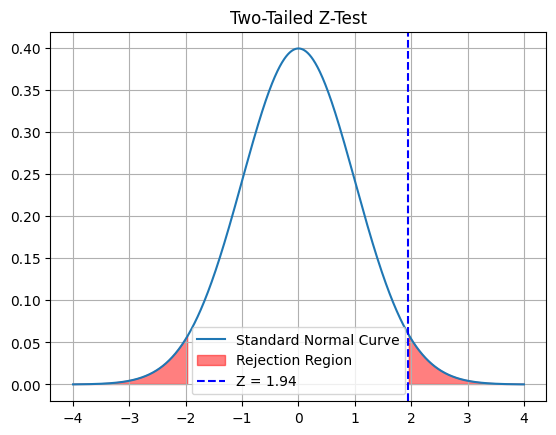

Z-score = 1.94, P-value = 0.0528


In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def two_tailed_z_test(sample_data, population_mean, population_std, alpha=0.05):
    sample_mean = np.mean(sample_data)
    n = len(sample_data)
    z_score = (sample_mean - population_mean) / (population_std / np.sqrt(n))
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

    # Visualization
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x)
    critical = stats.norm.ppf(1 - alpha / 2)

    plt.plot(x, y, label="Standard Normal Curve")
    plt.fill_between(x, y, where=(x < -critical) | (x > critical), color='red', alpha=0.5, label='Rejection Region')
    plt.axvline(z_score, color='blue', linestyle='--', label=f"Z = {z_score:.2f}")
    plt.title("Two-Tailed Z-Test")
    plt.legend()
    plt.grid()
    plt.show()

    return z_score, p_value

# Example
np.random.seed(0)
sample = np.random.normal(102, 15, 50)
z, p = two_tailed_z_test(sample, population_mean=100, population_std=15)
print(f"Z-score = {z:.2f}, P-value = {p:.4f}")


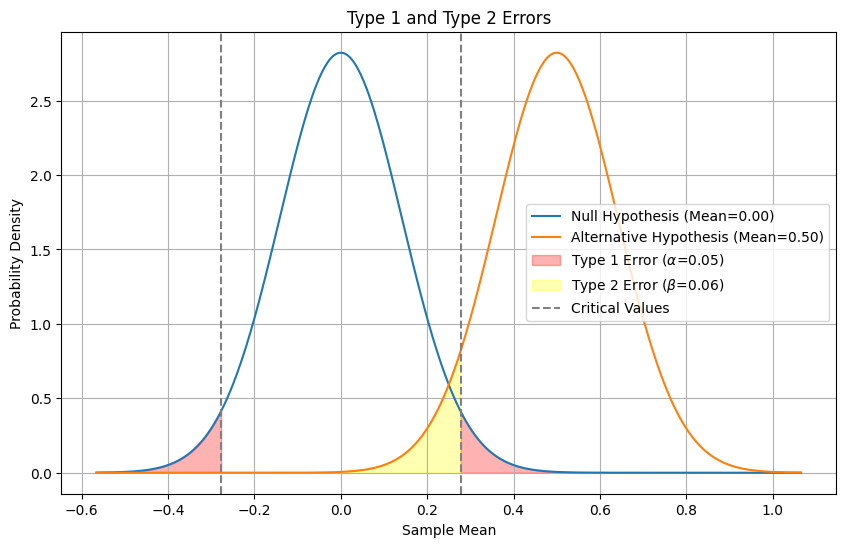

Calculated Type 1 Error (alpha): 0.0500
Calculated Type 2 Error (beta): 0.0576
Calculated Power (1 - beta): 0.9424


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_type1_type2_errors(null_mean, alternative_mean, std_dev, alpha, sample_size):
    """
    Calculates and visualizes Type 1 and Type 2 errors in hypothesis testing.

    Args:
        null_mean (float): The mean under the null hypothesis.
        alternative_mean (float): The mean under the alternative hypothesis.
        std_dev (float): The population standard deviation.
        alpha (float): The significance level (Type 1 error rate).
        sample_size (int): The size of the sample.
    """
    sem = std_dev / np.sqrt(sample_size)  # Standard Error of the Mean

    # Critical values for a two-tailed test
    critical_value_upper = norm.ppf(1 - alpha / 2, loc=null_mean, scale=sem)
    critical_value_lower = norm.ppf(alpha / 2, loc=null_mean, scale=sem)

    # Beta (Type 2 error rate) calculation
    beta_upper = norm.cdf(critical_value_upper, loc=alternative_mean, scale=sem)
    beta_lower = norm.cdf(critical_value_lower, loc=alternative_mean, scale=sem)
    beta = beta_upper - beta_lower

    power = 1 - beta

    # Visualization
    x = np.linspace(null_mean - 4 * sem, alternative_mean + 4 * sem, 500)
    y_null = norm.pdf(x, loc=null_mean, scale=sem)
    y_alt = norm.pdf(x, loc=alternative_mean, scale=sem)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y_null, label=f'Null Hypothesis (Mean={null_mean:.2f})')
    plt.plot(x, y_alt, label=f'Alternative Hypothesis (Mean={alternative_mean:.2f})')

    # Shade the rejection regions (Type 1 error)
    x_reject_right = np.linspace(critical_value_upper, null_mean + 4 * sem, 100)
    y_reject_right = norm.pdf(x_reject_right, loc=null_mean, scale=sem)
    plt.fill_between(x_reject_right, 0, y_reject_right, color='red', alpha=0.3, label=f'Type 1 Error ($\\alpha$={alpha:.2f})')

    x_reject_left = np.linspace(null_mean - 4 * sem, critical_value_lower, 100)
    y_reject_left = norm.pdf(x_reject_left, loc=null_mean, scale=sem)
    plt.fill_between(x_reject_left, 0, y_reject_left, color='red', alpha=0.3)

    # Shade the Type 2 error region
    x_type2 = np.linspace(critical_value_lower, critical_value_upper, 100)
    y_type2_alt = norm.pdf(x_type2, loc=alternative_mean, scale=sem)
    plt.fill_between(x_type2, 0, y_type2_alt, color='yellow', alpha=0.3, label=f'Type 2 Error ($\\beta$={beta:.2f})')

    plt.axvline(critical_value_upper, color='gray', linestyle='--', label=f'Critical Values')
    plt.axvline(critical_value_lower, color='gray', linestyle='--')

    plt.xlabel('Sample Mean')
    plt.ylabel('Probability Density')
    plt.title('Type 1 and Type 2 Errors')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Calculated Type 1 Error (alpha): {alpha:.4f}")
    print(f"Calculated Type 2 Error (beta): {beta:.4f}")
    print(f"Calculated Power (1 - beta): {power:.4f}")

# Example usage
visualize_type1_type2_errors(null_mean=0, alternative_mean=0.5, std_dev=1, alpha=0.05, sample_size=50)

In [12]:
import numpy as np
from scipy import stats

def perform_independent_ttest(group1_data, group2_data, alpha=0.05):
    """
    Performs an independent samples T-test and interprets the results.

    Args:
        group1_data (list or numpy.ndarray): Data for the first group.
        group2_data (list or numpy.ndarray): Data for the second group.
        alpha (float): Significance level (default is 0.05).
    """
    # Perform the independent samples t-test
    t_statistic, p_value = stats.ttest_ind(group1_data, group2_data)

    print("Independent Samples T-test Results:")
    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Significance Level (alpha): {alpha:.2f}")

    # Interpret the results
    if p_value < alpha:
        print("The p-value is less than the significance level.")
        print("We reject the null hypothesis.")
        print("There is statistically significant evidence that the means of the two groups are different.")
    else:
        print("The p-value is greater than or equal to the significance level.")
        print("We fail to reject the null hypothesis.")
        print("There is not enough statistically significant evidence to conclude that the means of the two groups are different.")

# Example usage
group_a = np.random.normal(loc=10, scale=2, size=50)
group_b = np.random.normal(loc=10.5, scale=2.5, size=60)
perform_independent_ttest(group_a, group_b)

group_c = np.random.normal(loc=5, scale=1, size=40)
group_d = np.random.normal(loc=7, scale=1.2, size=45)
perform_independent_ttest(group_c, group_d, alpha=0.01)

Independent Samples T-test Results:
T-statistic: -2.2850
P-value: 0.0243
Significance Level (alpha): 0.05
The p-value is less than the significance level.
We reject the null hypothesis.
There is statistically significant evidence that the means of the two groups are different.
Independent Samples T-test Results:
T-statistic: -8.7810
P-value: 0.0000
Significance Level (alpha): 0.01
The p-value is less than the significance level.
We reject the null hypothesis.
There is statistically significant evidence that the means of the two groups are different.


Paired Samples T-test Results:
T-statistic: -5.2047
P-value: 0.0000
Significance Level (alpha): 0.05
The p-value is less than the significance level.
We reject the null hypothesis.
There is statistically significant evidence that the means of the paired samples are different.


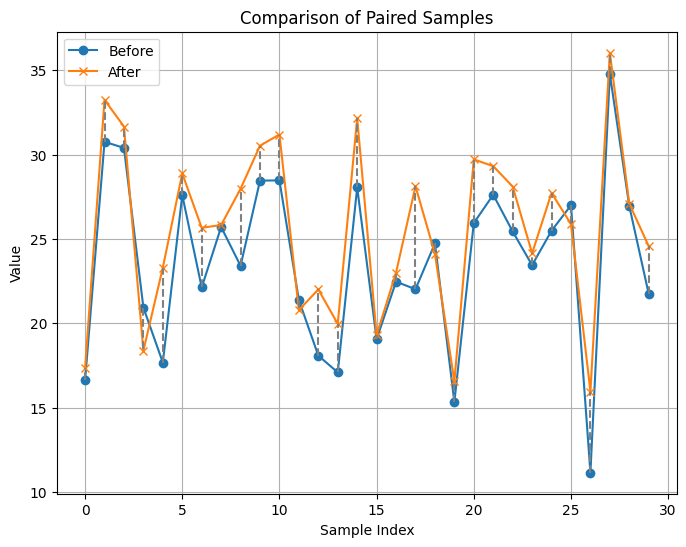

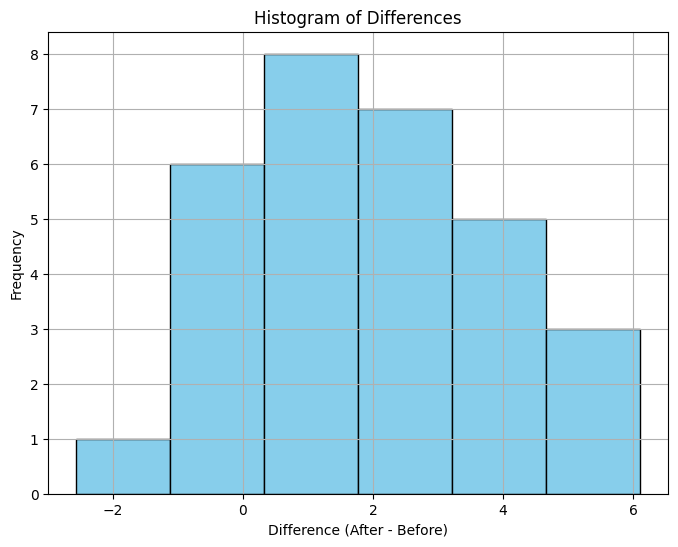

Paired Samples T-test Results:
T-statistic: 0.9728
P-value: 0.3404
Significance Level (alpha): 0.10
The p-value is greater than or equal to the significance level.
We fail to reject the null hypothesis.
There is not enough statistically significant evidence to conclude that the means of the paired samples are different.


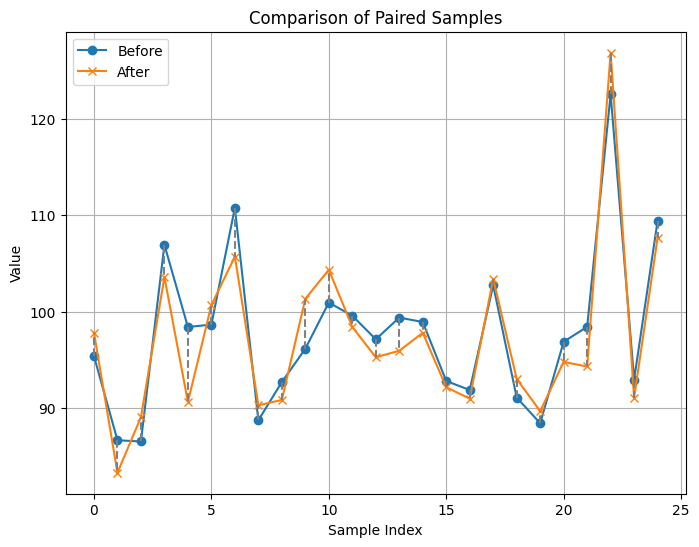

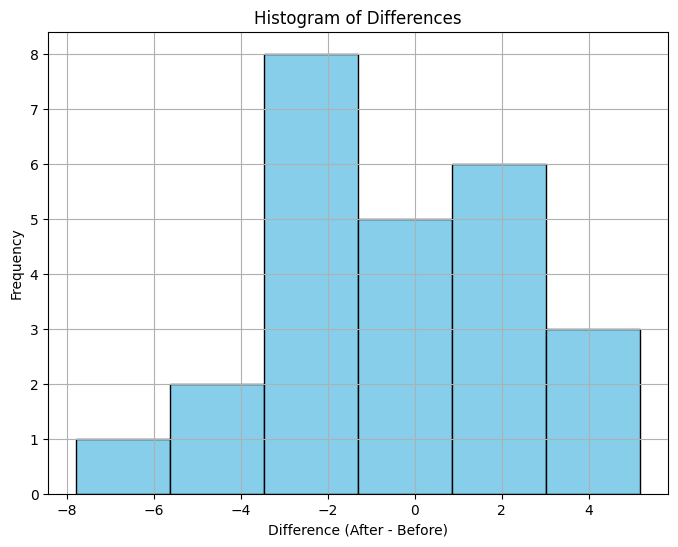

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def perform_paired_ttest_and_visualize(before_data, after_data, alpha=0.05):
    """
    Performs a paired sample T-test and visualizes the comparison results.

    Args:
        before_data (list or numpy.ndarray): Data before the intervention.
        after_data (list or numpy.ndarray): Data after the intervention (paired with before_data).
        alpha (float): Significance level (default is 0.05).
    """
    # Calculate the differences between the paired samples
    differences = np.array(after_data) - np.array(before_data)

    # Perform the paired samples t-test
    t_statistic, p_value = stats.ttest_rel(before_data, after_data)

    print("Paired Samples T-test Results:")
    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Significance Level (alpha): {alpha:.2f}")

    # Interpret the results
    if p_value < alpha:
        print("The p-value is less than the significance level.")
        print("We reject the null hypothesis.")
        print("There is statistically significant evidence that the means of the paired samples are different.")
    else:
        print("The p-value is greater than or equal to the significance level.")
        print("We fail to reject the null hypothesis.")
        print("There is not enough statistically significant evidence to conclude that the means of the paired samples are different.")

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(before_data)), before_data, marker='o', linestyle='-', label='Before')
    plt.plot(range(len(after_data)), after_data, marker='x', linestyle='-', label='After')

    # Connect the paired data points
    for i in range(len(before_data)):
        plt.plot([i, i], [before_data[i], after_data[i]], linestyle='--', color='gray')

    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title('Comparison of Paired Samples')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Histogram of the differences
    plt.figure(figsize=(8, 6))
    plt.hist(differences, bins='auto', color='skyblue', edgecolor='black')
    plt.xlabel('Difference (After - Before)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Differences')
    plt.grid(True)
    plt.show()

# Example usage
before_treatment = np.random.normal(loc=25, scale=5, size=30)
after_treatment = before_treatment + np.random.normal(loc=1.5, scale=2, size=30) # Simulate an increase
perform_paired_ttest_and_visualize(before_treatment, after_treatment)

before_study = np.random.normal(loc=100, scale=10, size=25)
after_study = before_study + np.random.normal(loc=0.2, scale=3, size=25) # Simulate no significant change
perform_paired_ttest_and_visualize(before_study, after_study, alpha=0.1)

In [14]:
import numpy as np
from scipy import stats

def compare_ztest_ttest(population_mean, population_std, sample_size, alpha=0.05, num_simulations=1000):
    """
    Simulates data from a population, performs Z-test and T-test on the samples,
    and compares the results by counting rejections of the null hypothesis.

    Args:
        population_mean (float): The true population mean.
        population_std (float): The true population standard deviation.
        sample_size (int): The size of each simulated sample.
        alpha (float): Significance level (default is 0.05).
        num_simulations (int): The number of simulations to run.
    """
    z_rejections = 0
    t_rejections = 0

    for _ in range(num_simulations):
        # Simulate a random sample from the population
        sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)
        sample_mean = np.mean(sample)
        sample_std_dev = np.std(sample, ddof=1) # Sample standard deviation (for T-test)
        sem = population_std / np.sqrt(sample_size) # Standard Error (for Z-test)

        # Perform Z-test (assuming known population standard deviation)
        z_statistic = (sample_mean - population_mean) / sem
        p_value_z = 2 * (1 - stats.norm.cdf(np.abs(z_statistic)))
        if p_value_z < alpha:
            z_rejections += 1

        # Perform T-test (assuming unknown population standard deviation)
        t_statistic = (sample_mean - population_mean) / (sample_std_dev / np.sqrt(sample_size))
        p_value_t = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=sample_size - 1))
        if p_value_t < alpha:
            t_rejections += 1

    print("Comparison of Z-test and T-test Results (based on", num_simulations, "simulations):")
    print(f"Number of times Z-test rejected the null hypothesis (at alpha={alpha:.2f}): {z_rejections}")
    print(f"Number of times T-test rejected the null hypothesis (at alpha={alpha:.2f}): {t_rejections}")
    print("---")
    print("Interpretation:")
    print("When the population standard deviation is known (as assumed by the Z-test here),")
    print("both tests should ideally control the Type 1 error rate around alpha.")
    print("However, in real-world scenarios, the population standard deviation is often unknown,")
    print("making the T-test more appropriate. The T-test accounts for the uncertainty")
    print("introduced by estimating the standard deviation from the sample.")
    print("For larger sample sizes, the results of the Z-test and T-test tend to converge")
    print("because the sample standard deviation becomes a more reliable estimate of the")
    print("population standard deviation, and the t-distribution approaches the normal distribution.")

# Example usage
population_mean = 5
population_std = 2
sample_size = 30
compare_ztest_ttest(population_mean, population_std, sample_size)

sample_size_small = 10
compare_ztest_ttest(population_mean, population_std, sample_size_small)

sample_size_large = 100

Comparison of Z-test and T-test Results (based on 1000 simulations):
Number of times Z-test rejected the null hypothesis (at alpha=0.05): 50
Number of times T-test rejected the null hypothesis (at alpha=0.05): 52
---
Interpretation:
When the population standard deviation is known (as assumed by the Z-test here),
both tests should ideally control the Type 1 error rate around alpha.
However, in real-world scenarios, the population standard deviation is often unknown,
making the T-test more appropriate. The T-test accounts for the uncertainty
introduced by estimating the standard deviation from the sample.
For larger sample sizes, the results of the Z-test and T-test tend to converge
because the sample standard deviation becomes a more reliable estimate of the
population standard deviation, and the t-distribution approaches the normal distribution.
Comparison of Z-test and T-test Results (based on 1000 simulations):
Number of times Z-test rejected the null hypothesis (at alpha=0.05): 54
N

In [15]:
import scipy.stats as stats
import numpy as np

def margin_of_error(sample, confidence=0.95):
    n = len(sample)
    se = stats.sem(sample)
    t_score = stats.t.ppf((1 + confidence) / 2, n - 1)
    return t_score * se

# Example
sample = np.random.normal(100, 15, 40)
moe = margin_of_error(sample, 0.95)
print(f"Margin of Error: {moe:.2f}")



Margin of Error: 4.28


In [17]:
import scipy.stats as stats
import numpy as np
def bayes_theorem(prior_A, prob_B_given_A, prob_B):
    return (prob_B_given_A * prior_A) / prob_B

# Example
prior_disease = 0.01
prob_positive_given_disease = 0.95
prob_positive = 0.05

posterior = bayes_theorem(prior_disease, prob_positive_given_disease, prob_positive)
print(f"Posterior Probability: {posterior:.4f}")


Posterior Probability: 0.1900


In [18]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example Data
data = pd.DataFrame({
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F'],
    'Preference': ['A', 'B', 'B', 'A', 'A', 'B']
})
contingency = pd.crosstab(data['Gender'], data['Preference'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2 = {chi2:.2f}, P-value = {p:.4f}")


Chi2 = 0.00, P-value = 1.0000


In [19]:
from scipy.stats import chi2_contingency

observed = np.array([[30, 10], [20, 40]])
_, _, _, expected = chi2_contingency(observed)
print("Expected Frequencies:\n", expected)


Expected Frequencies:
 [[20. 20.]
 [30. 30.]]


In [20]:

from scipy.stats import chisquare

observed = [50, 30, 20]
expected = [40, 40, 20]
chi2_stat, p_val = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi2 = {chi2_stat:.2f}, P-value = {p_val:.4f}")


Chi2 = 5.00, P-value = 0.0821


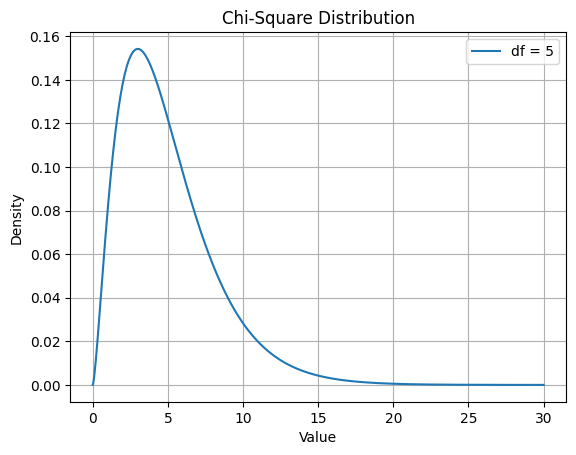

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import chi2

df = 5
x = np.linspace(0, 30, 1000)
y = chi2.pdf(x, df)

plt.plot(x, y, label=f'df = {df}')
plt.title("Chi-Square Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()


In [22]:
def f_test(sample1, sample2):
    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)
    f_stat = var1 / var2
    df1 = len(sample1) - 1
    df2 = len(sample2) - 1
    p_value = 1 - stats.f.cdf(f_stat, df1, df2)
    return f_stat, p_value

# Example
s1 = np.random.normal(10, 2, 30)
s2 = np.random.normal(10, 3, 30)
f_stat, p_val = f_test(s1, s2)
print(f"F-stat = {f_stat:.2f}, P-value = {p_val:.4f}")


F-stat = 0.87, P-value = 0.6505


In [23]:
from scipy.stats import f_oneway

# Example Groups
group1 = np.random.normal(100, 10, 20)
group2 = np.random.normal(105, 10, 20)
group3 = np.random.normal(110, 10, 20)

f_stat, p_val = f_oneway(group1, group2, group3)
print(f"F-statistic = {f_stat:.2f}, P-value = {p_val:.4f}")


F-statistic = 2.57, P-value = 0.0850


<ipython-input-24-fcc72d8e79f2>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2, group3], labels=["Group1", "Group2", "Group3"])


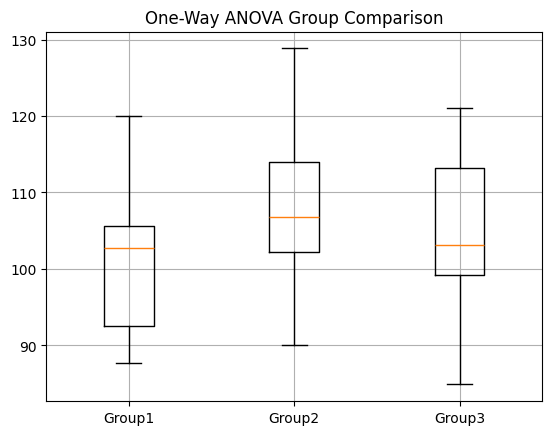

In [24]:
import matplotlib.pyplot as plt

plt.boxplot([group1, group2, group3], labels=["Group1", "Group2", "Group3"])
plt.title("One-Way ANOVA Group Comparison")
plt.grid(True)
plt.show()
